<a href="https://colab.research.google.com/github/ejrtks1020/Bigdata_Analysis_Certification/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Ex_CEOSalary.csv')

FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
df['industry'].value_counts()

In [ ]:
df['industry'] = df['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

In [ ]:
df['industry'].value_counts()

In [ ]:
%matplotlib inline
df['industry'].value_counts().plot(kind = 'pie');

In [ ]:
df['industry'].value_counts().plot(kind = 'bar');

In [ ]:
df.describe()

In [ ]:
df.skew()

In [ ]:
df['salary'].plot(kind = 'kde')

In [ ]:
df.kurtosis()

In [ ]:
df['salary'].idxmax()

In [ ]:
df.loc[173]

In [ ]:
df['salary'].std()

In [ ]:
df['salary'].hist()

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins = 50 , figsize = (20, 15));

In [ ]:
df['salary'].hist(bins = 50, figsize = (10 , 8))

In [ ]:
df['sales'].hist(bins = 50, figsize = (10 , 8));

In [ ]:
plt.scatter(df['sales'], df['salary'], alpha = 0.5)
plt.show()

In [ ]:
plt.scatter(df['roe'], df['salary'], alpha = 0.5)
plt.show()

In [ ]:
df.groupby('industry')[['salary']].describe()

In [ ]:
df.boxplot(column = 'salary', return_type='both');

In [ ]:
df.boxplot(column = 'sales', return_type = 'both');

In [ ]:
df.boxplot(column = 'roe', return_type = 'both');

In [ ]:
Q3_salary = df['salary'].quantile(q = 0.75)
Q1_salary = df['salary'].quantile(q = 0.25)
IQR = Q3_salary - Q1_salary

upper_salary = Q3_salary + 1.5 * IQR
lower_salary = Q1_salary - 1.5 * IQR

In [ ]:
df = df[ (df['salary'] < upper_salary) & (df['salary'] > lower_salary)]

In [ ]:
df['salary'].hist();

In [ ]:
df.hist(bins = 50 , figsize = (20, 15));

In [ ]:
df.corr()

In [ ]:
plt.scatter(df['sales'], df['salary'], alpha = 0.5);

다음은 roe와 salary간의 산점도이다. salary중 큰값들이 제거되어 골고루 분포되어 있는 양상을 보인다.

In [ ]:
plt.scatter(df['roe'], df['salary'], alpha = 0.5);

In [ ]:
df = pd.read_csv('Ex_CEOSalary.csv')

In [ ]:
Q3_sales = df['sales'].quantile(q = 0.75)
Q1_sales = df['sales'].quantile(q = 0.25)

IQR_sales= Q3_sales - Q1_sales
upper_sales = Q3_sales + 1.5 * IQR_sales
lower_sales = Q1_sales - 1.5 * IQR_sales

In [ ]:
df_IQR = df[ ((df['sales'] < upper_sales) & (df['sales'] > lower_sales)) &
            ((df['salary'] < upper_salary) & (df['salary'] > lower_salary))]

In [ ]:
df_IQR['sales'].hist();

In [ ]:
df_IQR.hist(bins = 50, figsize = (10, 7));

In [ ]:
df_IQR.corr()

#4. 변수 변환

> 들여쓴 블록



##4.1 로그변환

In [ ]:
import numpy as np

In [ ]:
df['log_salary'] = np.log1p(df['salary'])
df['log_sales'] = np.log1p(df['sales'])
df['log_roe'] = np.log1p(df['roe'])

df.head()

원데이터와 로그변환데이터를 비교해 보면 아주 쉽게 이상치 값이 중앙으로 이동한 것을 확인 할 수 있다.

In [ ]:
df.hist(bins = 50, figsize = (10, 8));

상관계수가 0.11, 0.12 에서 0.46, 0.18로 향상되었다.

In [ ]:
df.corr()

##4.2 제곱근 변환

In [ ]:
df['sqrt_salary'] = np.sqrt(df['salary'])
df['sqrt_sales'] = np.sqrt(df['sales'])
df['sqrt_roe'] = np.sqrt(df['roe'])

df.head()

In [ ]:
df.hist(bins = 50, figsize = (10, 8));

In [ ]:
df.corr()

#5. 결측치 처리

##5.1 결측치 확인

###가. 전체 및 변수별 결측 확인

In [ ]:
df = pd.read_csv('Ex_Missing.csv')

In [ ]:
df

In [ ]:
df.isnull()

In [ ]:
pd.isnull(df)

In [ ]:
df.notnull()

In [ ]:
pd.notnull(df)

In [ ]:
df.isnull().sum()

In [ ]:
df['salary'].isnull().sum()

In [ ]:
df.notnull().sum()

In [ ]:
df['salary'].notnull().sum()

###나. 행별 결측 확인 및 저장

In [ ]:
df.isnull().sum(1)

* 행 단위 결측값 개수 구해서 새 변수 생성

In [ ]:
df['missing'] = df.isnull().sum(1)

In [ ]:
df

* 행 단위 실측값 개수 구하기

In [ ]:
df['valid'] = df.notnull().sum(1)

In [ ]:
df

## 5.2 결측값 제거: dropna()

###가. 결측값 있는 행 제거

In [ ]:
df_del_row = df.dropna(axis = 0)
df_del_row

###나. 결측값 있는 열 제거

In [ ]:
df_del_col = df.dropna(axis = 1)

In [ ]:
df_del_col

In [ ]:
df = pd.read_csv('Ex_Missing.csv')

###다. 결측값 있는 특정 행/열 제거

In [ ]:
df[['salary']].dropna()

In [ ]:
df[['salary', 'sales', 'roe', 'industry']].dropna()

In [ ]:
df[['salary', 'sales', 'roe', 'industry']].dropna(axis = 1)

## 5.3 결측값 대체
* 결측값을 측정 값으로 대체
* 결측값을 변수별 평균으로 대체
* 결측값을 다른 변수의 값으로 대체
* 결측값을 그룹 평균값으로 대체

###가. 특정값으로 대체

In [ ]:
df = pd.read_csv('Ex_Missing.csv')

In [ ]:
data_0 = df.fillna(0)
data_0

In [ ]:
data_missing = df.fillna('missing')
data_missing

* 결측치를 앞쪽 값으로 채우는 방법

In [ ]:
df_ffill = df.fillna(method = 'ffill')
#df_ffill = df.fillna(method = 'pad')

In [ ]:
df_ffill

* 데이터를 뒤쪽 값으로 채우는 방법

In [ ]:
df_bfill = df.fillna(method = 'bfill')
#df_ffill = df.fillna(method = 'backfill')
df_bfill

###평균 대체

* df.fillna(df.mean())
* df.where(pd.notnull(df), df.mean(), axis = 'columns')

In [ ]:
df.where(df.notnull(), df.mean(), axis = 'columns') # condition이 false인곳을 평균값으로 대체

In [ ]:
df_mean = df.fillna(df.mean())
df_mean

In [ ]:
df_median = df.fillna(df.median()) #중위수 대체

In [ ]:
df_max = df.fillna(df.max()) #최댓값으로 대체

In [ ]:
df_other_mean = df.fillna(df['salary'].mean()) #다른변수의 평균값으로 대체

In [ ]:
df_other_mean

###다. 다른 변수 값으로 대체

In [ ]:
df2 = df.copy()
df2['sales_new'] = np.where(pd.notnull(df2['sales']) == True, df2['sales'], df2['salary']) #sales 변수가 결측값이아니면 sales값 그대로, 결측값이면 salary값으로 대체
df2

###라. 집단 평균값으로 대체

In [ ]:
df.groupby('industry').mean()

In [ ]:
fill_mean_func = lambda g : g.fillna(g.mean())

In [ ]:
df_group_mean = df.groupby('industry').apply(fill_mean_func)
df_group_mean

집단별로 평균값이 아닌 특정 값으로 대체

In [ ]:
fill_values = {1: 1000, 2: 2000}

In [ ]:
fill_func = lambda d : d.fillna(fill_values[d.name])

In [ ]:
df_group_value = df.groupby('industry').apply(fill_func)

In [ ]:
df_group_value

변수 별로 다른 대체방법 적용

In [ ]:
missing_fill_val = {'salary' : df.salary.interpolate(),
                    'sales' : df.sales.mean(),
                    'roe' : 'missing'} 

print(missing_fill_val)

In [ ]:
df_multi = df.fillna(missing_fill_val)
df_multi

#6. 데이터정제 실전과제

##6.1 데이터 불러오기 및 탐색

In [ ]:
import pandas as pd
df = pd.read_csv('house_raw.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.hist(bins = 50, figsize = (10, 7));

bedrooms, households, rooms의 데이터가 왼쪽에 거의 몰려있음

##6.2 선형회귀 적용 (정제 전 데이터)

In [ ]:
X = df[df.columns[0:5]]
y = df[['house_value']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

훈련 데이터 및 테스트 데이터의 독립변수 단위를 동일하게 만드는 정규화 진행 (Min-Max)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

In [ ]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

훈련 데이터의 정확도(R-square: 설명력)를 확인한 결과, 55%를 보인다.

In [ ]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

정확도 확인결과, -282% 라는 말도 안되는 값이 나왔다.

정확도는 0 ~ 1 사이 값이어야 하므로 음수가 나올수 없음.

##6.3 데이터 정제를 위한 세부 검토

###가. bedrooms

bedrooms 변수 분포 확인결과 0.6이상에서 매우 큰값이 존재한다. 따라서 0.6 미만의 데이터만 따로 분포를 보면 아래와 같다

In [ ]:
df_bedroom = df[df['bedrooms'] < 0.6]
df_bedroom['bedrooms'].hist(bins = 100 , figsize = (10, 7));

In [ ]:
df_bedroom2 = df[df['bedrooms'] >= 0.6]
print(df_bedroom2['bedrooms'].value_counts())

In [ ]:
df_bedroom2.shape

In [ ]:
df_bedroom2

badrooms 변수가 0.6보다 큰 데이터의 개수를 확인한 결과, 14개의 데이터가 존재, 수가 적으므로 제거해도 전체 데이터에 큰 영향없을것으로 보임

###나. households

households의 분포를 확인한 결과 10이상에서 매우 큰 값들이 존재, 따라서 10 미만의 데이터만 따로 분포를 보면 아래와 같다

In [ ]:
df_household = df[df['households'] < 10]
df_household['households'].hist(bins = 100, figsize = (10 , 8));

In [ ]:
df[df['households'] >= 10].shape

In [ ]:
df[df['households'] >= 10]

10이상인 데이터도 22개 밖에 없으므로 제거해도 큰 영향은 끼치지 않을것으로 보인다.

###다. rooms

rooms 변수는 20이상에서 매우 큰 값들이 존재하므로 따로 20 미만의 값들만 분포를 보면 아래와 같다.

In [ ]:
df_rooms = df[df['rooms'] < 20]
df_rooms['rooms'].hist(bins = 100, figsize = (10, 8))

In [ ]:
df[df['rooms'] >= 20].shape[0]

rooms변수가 20이상인 값들이 64개로 이전 변수들보다는 많지만 전체데이터가 훨씬 많으므로 제거해도 큰 영향없을것으로 보인다.

##6.4 정제 데이터셋 생성

임의로 정상데이터셋의 기준을 침실 0.5 미만, 가족수 7명 미만, 방 12개 미만으로 정한다.

In [ ]:
new_df = df[(df['bedrooms'] < 0.5) & (df['households'] < 7) & (df['rooms'] < 12)]

In [ ]:
new_df.describe()

정상데이터의 기술통계확인 결과 평균과 중위수(50%)의 차이가 크게없고, 최대값도 지나치게 크지않는것을 볼 수 있다.

In [ ]:
new_df.hist(bins = 50, figsize = (10, 6));

정상데이터의 히스토그램 확인결과, 모든 변수들이 정규분포와 비슷하다.

##6.5 선형회귀 적용(정제 후 데이터)

In [ ]:
X = new_df[new_df.columns[0:5]]
y = new_df[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_scaled_train, y_train)

train_pred = model.predict(X_scaled_train)
print("훈련 데이터 정확도: ", model.score(X_scaled_train, y_train))

test_pred = model.predict(X_scaled_test)
print("테스트 데이터 정확도: ", model.score(X_scaled_test, y_test))

이상치를 제거해서 학습한 결과, 

테스트 데이터 정확도가 음수값에서 58%로 매우 향상되었다

In [ ]:
new_df.to_csv('house_price.csv' , index = False)

#2. 머신러닝 맛보기1: 분류문제

1.   항목 추가
2.   항목 추가



##2.1 분석 데이터 검토

In [ ]:
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.csv')
df.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [ ]:
#레이블 변수(유방암)의 비율확인을 위해 'class'변수의 빈도를 확인

df['Class'].value_counts(sort = False)

0    444
1    239
Name: Class, dtype: int64

In [ ]:
#행과 열 구조 확인
#첫번째 변수인 'code'는 실제변수가 아니라 환자코드이므로 분석에서 특징 변수로 활용하지않는다
df.shape

(683, 11)

##2.2 특성(X)과 레이블(y)로 나누기

In [ ]:
# 방법1: 특성 이름으로 특성 데이터셋(X) 나누기
X1 = df[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
# 방법2: 특성 위치값으로 데이터셋 나누기
X2 = df[df.columns[1:10]]
# 방법3: loc함수로 특성 데이터셋 나누기(단, 불러올 특성이 연달아 있어야함)
X3 = df.loc[: , 'Clump_Thickness' : 'Mitoses']

In [ ]:
X1.shape, X2.shape, X3.shape

((683, 9), (683, 9), (683, 9))

In [ ]:
y = df[['Class']] #대괄호를 두번 감싸야 데이터프레임 형태가 되므로 주의한다

In [ ]:
y.shape

(683, 1)

##2.3 train_test 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 42, stratify = y) 
#훈련데이터와 테스트데이터를 같은 레이블 비율을 가지도록 분류한다.

In [ ]:
print(y_train.mean(),'\n',y_test.mean())

Class    0.349609
dtype: float64 
 Class    0.350877
dtype: float64


##2.4 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = MinMaxScaler()
standard = StandardScaler()

###가. train_data 정규화

In [ ]:
minmax.fit(X_train)
X_scaled_minmax_train = minmax.transform(X_train)

In [ ]:
standard.fit(X_train)
X_scaled_standard_train = standard.transform(X_train)

In [ ]:
pd.DataFrame(X_scaled_minmax_train).describe() #정규화된 데이터의 기술통계확인, 모든 변수가 최소 0 , 최대 1

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(X_scaled_standard_train).describe() # 모든 변수가 평균이 거의 0, 표준편차가 1을 나타냄

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


###나. 테스트 데이터 정규화

In [ ]:
X_scaled_minmax_test = minmax.transform(X_test)
X_scaled_standard_test = standard.transform(X_test)

In [ ]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


표준화의 기준이 훈련데이터이기 때문에 평균이 0이 아니고 표준편차도 1이아니다.

##2.5 모델 학습

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

모델 훈련 -> 모델 예측 -> 모델 정확도

In [ ]:
#테스트 데이터
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [ ]:
#얼마나 맞췄고(정분류), 얼마나 틀렸는지(오분류) 세부적으로 살펴보기
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, pred_train)
print("훈련 데이터 오차행렬:\n", confusion_train) # 행 : 실제 값 0 1, 열 : 예측한 값 0  1

훈련 데이터 오차행렬:
 [[328   5]
 [  9 170]]


정상(0) 333명중 328명을 제대로 분류

환자(1) 179명중 170명을 제대로 분류

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [ ]:
#상세한 평가지표 확인 : classification_report
from sklearn.metrics import classification_report
report_train = classification_report(y_train, pred_train)
print("분류 예측 레포트:\n", report_train)

분류 예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [ ]:
report_test = classification_report(y_test, pred_test)
print("분류 예측 레포트:\n", report_test)

분류 예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#또 다른 평가지표 : roc_auc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

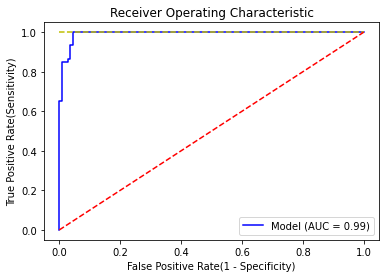

In [ ]:
#ROC Curve 그리기
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate(1 - Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'Model (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.show()

##2.6 예측값 병합 및 저장

In [ ]:
#실제값, 예측값(범주), 예측확률을 y_train, y_test에 각각 저장
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train[['y_pred']] = pred_train
y_train[['y_prob0', 'y_prob1']] = prob_train
y_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [ ]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [ ]:
#pd.concat -> axis가 0이면 같은 특성을 가지는 데이터를 추가, axis가 1이면 변수(칼럼)을 합친다.
Total_test = pd.concat([X_test, y_test], axis = 1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [ ]:
Total_test.to_csv("classification_test.csv")

# 3. 머신러닝 맛보기2: 회귀문제

In [ ]:
import pandas as pd
df = pd.read_csv('house_price.csv')
df.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [ ]:
print(df.shape)

(17689, 6)


In [ ]:
df.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


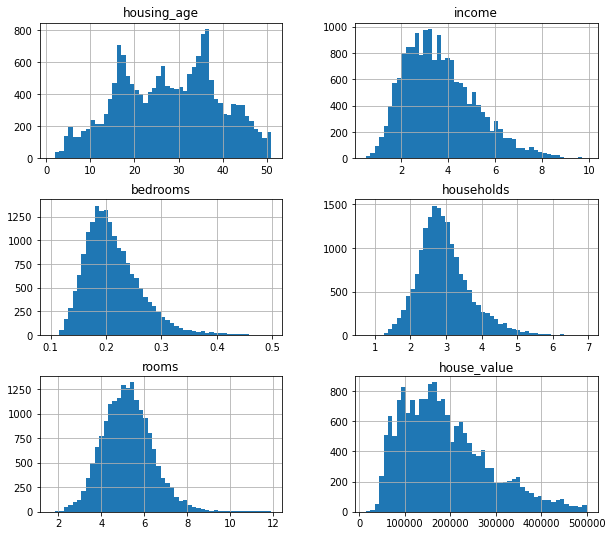

In [ ]:
df.hist(bins = 50, figsize = (10, 9));

이미 한번 정제를 진행한 데이터이므로 머신러닝을 수행하는데 큰 문제가 없다.

##3.2 특성(X)과 레이블(y) 나누기

In [ ]:
#방법1
X1 = df[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
#방법2
X2 = df[df.columns[0:5]]
#방법3
X3 = df.loc[:, 'housing_age':'rooms']

In [ ]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(17689, 5)
(17689, 5)
(17689, 5)


In [ ]:
y = df[['house_value']]

In [ ]:
y.shape

(17689, 1)

## 3.3 train-test 데이터셋 나누기

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X1, y, random_state = 42) #회귀 데이터이므로 stratify = y 옵션을 설정할 수 없다.

In [ ]:
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


##3.4 정규화

In [ ]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

###가. train data 정규화

In [ ]:
X_scaled_minmax_train = scaler_minmax.fit_transform(X_train)

In [ ]:
X_scaled_standard_train = scaler_standard.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,5.615556e-18,1.545659e-16,7.976140e-16,-1.150896e-16,-3.631616e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


###나. 테스트 데이터 정규화

In [ ]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
X_scaled_standard_test = scaler_standard.transform(X_test)

In [ ]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


In [ ]:
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.014279,0.000196,-0.004814,0.040879,0.025222
std,1.013373,1.006675,0.984789,1.039304,1.018846
min,-2.342832,-2.081653,-1.864897,-2.593803,-3.049856
25%,-0.830678,-0.766493,-0.699423,-0.648287,-0.685507
50%,0.058824,-0.139666,-0.190013,-0.109012,-0.029221
75%,0.770426,0.592419,0.516912,0.563130,0.636293
max,2.104679,4.045937,5.352917,5.535878,5.641914


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5706921210926263

In [ ]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5826083517811865

설명력(model.score , R-square)외에도 회귀모델에서 자주 보는 모델평가지표는 RMSE(Root Mean Squared Error)이다. 

설명력이 '맞는정도'라면 RMSE는 '틀린 정도', 즉 오차를 판단한다.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61763.84882543206

주택가격을 예측하니 평균적으로 6만달러 내외로 오차가 존재한다.

In [ ]:
#선형 모델 평가지표 2: MAE(Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , pred_test)


46218.35635910518

In [ ]:
#선형 모델 평가지표 3: MSE(Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

3814773021.730826

In [ ]:
#선형 모델 평가지표 4: MAPE(Mean Absolute Percentage Error)
def MAPE(y_test, y_pred):
  return np.mean(np.abs((y_test - pred_test) / y_test)) * 100

MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

In [ ]:
#선형 모델 평가지표 5: MPE(Mean Percentage Error)
def MPE(y_test, y_pred):
  return np.mean((y_test - pred_test) / y_test) * 100
MPE(y_test, pred_test)

house_value   -12.178049
dtype: float64

##3.6 예측값 병합 및 저장

In [ ]:
pred_train = model.predict(X_scaled_minmax_train)
y_train[['y_pred']] = pred_train
y_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,house_value,y_pred
17235,56700,30143.543694
14220,101400,199835.492874
3280,271400,272103.037256
15279,88900,28899.099715
14727,95300,113477.567588
...,...,...
11284,142400,115628.685921
11964,134200,77955.022737
5390,225000,137618.822679
860,378200,255862.726626


In [ ]:
pred_test = model.predict(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,house_value,y_pred
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [ ]:
Total_test = pd.concat([X_test, y_test], axis = 1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [ ]:
Total_test.to_csv("regression_test.csv")

#4. 머신러닝 프로세스1: 범주변수의 변환

##4.1 데이터 범주-연속-레이블로 나누기

In [ ]:
import pandas as pd
df = pd.read_csv('vote.csv') #유권자 선거 행동 데이터 y = 'vote' - 대선 투표 여부(0,1) , 'parties' - 지지 정당(1,2,3,4)
df.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           211 non-null    int64  
 1   region           211 non-null    int64  
 2   edu              211 non-null    int64  
 3   income           211 non-null    int64  
 4   age              211 non-null    int64  
 5   score_gov        211 non-null    int64  
 6   score_progress   211 non-null    int64  
 7   score_intention  211 non-null    float64
 8   vote             211 non-null    int64  
 9   parties          211 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 16.6 KB


범주형 변수 - gender(성별),  region (지역)

In [ ]:
X1 = df[['gender' , 'region']]
XY = df[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention', 'vote', 'parties']]

범주형 변수와 그외 변수로 나눈다.

##4.2 범주형 변수의 One-hot-encoding 변환

In [ ]:
X1['gender'] = X1['gender'].replace([1,2], ['male' ,'female'])
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheong', 'Honam', 'Youngnam', 'Others'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [ ]:
X1_dum = pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


##4.3 자료 통합 및 저장하기

In [ ]:
Fvote = pd.concat([X1_dum,XY], axis = 1)
Fvote.head()

,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [ ]:
Fvote.to_csv('Fvote.csv', index = False, sep = ',')

#5. 머신러닝 프로세스2: 데이터셋 분할과 모델검증

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('Fvote.csv')
df.head()

,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [ ]:
#변수 위치값으로 데이터셋 나누기
X = df[df.columns[:13]]

In [ ]:
y = df[['vote']]

##5.2 train-test 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(158, 13)
(53, 13)


##5.3 모델적용

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

###가. 랜덤 없는 교차검증: cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv = 5)
print("5개의 테스트셋(검증셋) 정확도: " , score)
print("정확도 평균: ", score.mean())

5개의 테스트셋(검증셋) 정확도:  [0.71875    0.6875     0.8125     0.58064516 0.80645161]
정확도 평균:  0.7211693548387096


###나. 랜덤 있는 교차검증: K-Fold

In [ ]:
#K - Fold가 cross_val_score와 다른점은 훈련데이터를 그룹들로 나눌때 순서를 뒤섞을수 있다는 점이있다(shuffle = True)
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
score = cross_val_score(model, X_train, y_train, cv  = kfold)
print("5개의 테스트셋(검증셋) 정확도: " , score)
print("정확도 평균: ", score.mean())

5개의 테스트셋(검증셋) 정확도:  [0.71875    0.6875     0.625      0.70967742 0.77419355]
정확도 평균:  0.7030241935483872


###다. 임의분할 교차검증: ShuffleSplit


In [ ]:
#ShulffleSplit(임의분할 교차검증)은 훈련데이터와 테스트 데이터를 구성할 때 다른 교차 검증에 사용되었던 데이터도 랜덤으로 선택되게 하는 방법
# 따라서 전체 데이터중 훈련 데이터나 테스트데이터 어디에도 선택되지않을수도 있다.
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = 0.5, train_size = 0.5, random_state = 42)
score = cross_val_score(model ,X_train, y_train, cv = shuffle_split)
print("교차검증 정확도: " , score)

교차검증 정확도:  [0.73417722 0.69620253 0.70886076 0.73417722 0.65822785 0.67088608
 0.72151899 0.65822785 0.69620253 0.70886076]


##5.4 train-validity-test 분할과 교차검증

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val , X_test, y_train_val, y_test = train_test_split(X, y, random_state = 1)
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, random_state = 2)

In [ ]:
model.fit(X_train, y_train)
score = cross_val_score(model , X_train, y_train, cv = 5)
print("교차검증 정확도:" ,score)
print("정확도 평균: ", score.mean())

교차검증 정확도: [0.58333333 0.66666667 0.70833333 0.65217391 0.65217391]
정확도 평균:  0.652536231884058


In [ ]:
model.score(X_val , y_val)

0.65

In [ ]:
model.score(X_test, y_test)

0.6981132075471698

#6. 머신러닝 프로세스3: 데이터 정규화

In [ ]:
import pandas as pd
df = pd.read_csv('Fvote.csv')
df.head()

,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [ ]:
df.describe()

,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


선거행동 데이터의 기술통계를 살펴보면 각 변수의 평균, 편차 수준이 다르다.

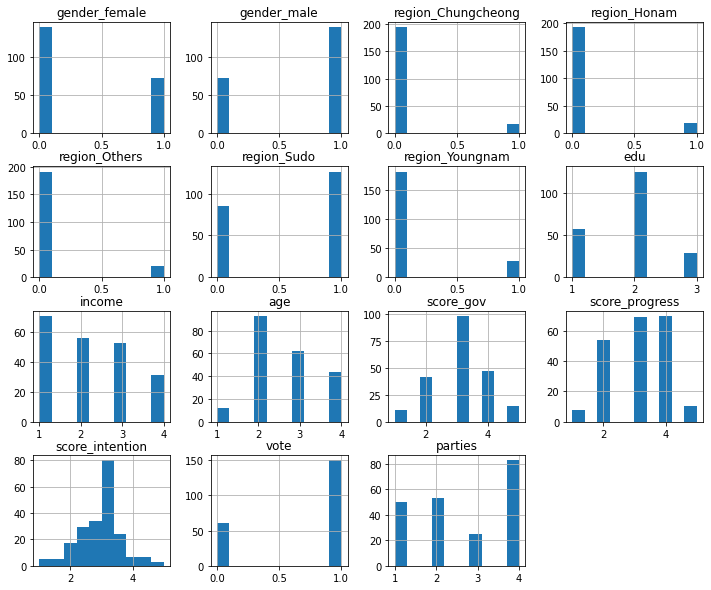

In [ ]:
df.hist(figsize = (12, 10));

##6.2 특성(x)과 레이블(y) 나누기

In [ ]:
X = df.loc[: ,'gender_female':'score_intention']
y = df[['vote']]

In [ ]:
print(X.shape)
print(y.shape)

(211, 13)
(211, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [ ]:
# 학습데이터와 테스트데이터의 투표여부(0, 1) 비율 확인
print(y_train.mean())
print(y_test.mean())

vote    0.708861
dtype: float64
vote    0.716981
dtype: float64


##6.4 연속형 특성의 Scaling

###가. Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [ ]:
X_scaled_minmax_train = minmax_scaler.fit_transform(X_train) #train데이터 기준(최대/최소)으로 정규화

In [ ]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_scaled_minmax_test = minmax_scaler.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.396226,0.603774,0.037736,0.188679,0.075472,0.584906,0.113208,0.424528,0.433962,0.540881,0.533019,0.537736,0.478302
std,0.493793,0.493793,0.192380,0.394998,0.266679,0.497454,0.319878,0.316170,0.355572,0.279089,0.240381,0.226789,0.163939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.500000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


###나. Standardization 스케일링

In [ ]:
#표준화는 평균이 0, 표준편차가 1이 되도록 값의 단위를 정규화하는것
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()


In [ ]:
X_scaled_standard_train = standard_scaler.fit_transform(X_train)
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,8.432074e-18,7.307797e-17,-2.810691e-17,1.127790e-16,-2.318820e-17,-1.405346e-18,-8.853677e-17,6.201087e-17,-8.151004e-17,-2.389088e-17,3.934968e-17,4.356571e-17,-4.863374e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-1.884881e+00,-2.167287e+00,-2.122900e+00,-2.558829e+00
25%,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-7.525190e-01,-8.338316e-01,-1.100283e+00,-6.833719e-01
50%,-6.903879e-01,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,-1.664780e-01,-1.863380e-01,-3.375836e-02,-7.766706e-02,1.203955e-01
75%,1.448461e+00,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,7.729337e-01,3.798429e-01,1.033006e+00,9.449492e-01,6.562405e-01
max,1.448461e+00,6.903879e-01,3.087610e+00,4.068852e+00,2.979094e+00,8.143451e-01,2.422719e+00,1.806199e+00,1.712345e+00,1.512205e+00,2.099770e+00,1.967565e+00,2.799620e+00


In [ ]:
X_scaled_standard_test = standard_scaler.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.157080,-0.157080,-0.195140,0.568310,-0.085501,-0.033413,-0.091762,-0.039057,0.117118,-0.047463,0.107135,0.076690,0.004127
std,1.056149,1.056149,0.656302,1.704266,0.883978,1.015962,0.907008,1.013804,1.002085,0.948089,1.025719,0.927672,0.878457
min,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-1.884881,-2.167287,-2.122900,-1.487139
25%,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-0.752519,-0.033758,-0.077667,-0.683372
50%,-0.690388,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,-0.166478,0.379843,-0.033758,-0.077667,0.120396
75%,1.448461,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,0.772934,0.379843,1.033006,0.944949,0.388318
max,1.448461,0.690388,3.087610,4.068852,2.979094,0.814345,2.422719,1.806199,1.712345,1.512205,2.099770,1.967565,2.263775


##6.5 모델 학습


###가. Min-Max 정규화 데이터 적용 결과

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.7278481012658228

In [ ]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test) #X에는 테스트 샘플, y에는 실제 레이블이 들어간다.

0.7169811320754716

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train , pred_train)
print(confusion_train)

[[  9  37]
 [  6 106]]


투표를 안한 사람(0)에 대한 예측이 잘못이루어지고 있다. 알고리즘만의 잘못이 아니다.

현재의 특성변수들로 투표를 안할지에 대한 예측이 어렵다는 뜻이다. 

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print(confusion_test)

[[ 2 13]
 [ 2 36]]


테스트 데이터 혼동행렬 역시 투표를 안할지에 대한 예측이 어려운 것으로 보인다.

###나.Standardize 정규화 데이터 적용 결과

In [ ]:
model = LogisticRegression()
model.fit(X_scaled_standard_train, y_train)
pred_train = model.predict(X_scaled_standard_train)
pred_test = model.predict(X_scaled_standard_test)
model.score(X_scaled_standard_train, y_train)

0.740506329113924

min-max = 72%       standardization = 74%

표준화가 근소하게 정확도가 높다

In [ ]:
model.score(X_scaled_standard_test, y_test)

0.6792452830188679

min-max = 71%  standardize = 68%

테스트 데이터 정확도는 min-max가 더 높다.

훈련 데이터에 과대적합된것으로 보인다.

In [ ]:
confusion_train = confusion_matrix(y_train, pred_train)
print(confusion_train)

[[ 12  34]
 [  7 105]]


학습데이터에 대해서 제대로 투표를 안한사람에 대한 예측이 12명으로 min-max방식보다 더 좋은 결과를 보인다. 

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print(confusion_test)

[[ 3 12]
 [ 5 33]]


* min-max와 standardize 방식중 어느방식이 더 좋다고 말하기 어렵다.
다만 일반적인 머신러닝이나 딥러닝에서는 min-max방식을 더 선호한다.

* 특히 딥러닝 모델의 경우, 여러번 행렬 연산을 통해 가중치와 데이터를 곱하기 때문에 너무 큰값이나 작은값이 될 가능성을 줄이는 min-max가 더 안정적이다.

* min -max는 0~1 사이의 한정된 범위인 반면 표준화는 이론상 무한대의 값이 나타날 수 있기 때문이다